# ---------------------Hierarchical Clustering-------------------

## Wholesale Customer Segmentation::
    The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

In [1]:
## importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
path = '/home/ashish/projects/HIerarchicalClustering/Wholesale customers data.csv'
dataset = pd.read_csv(path)
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [14]:
dataset.shape

(440, 8)

 ## NOW::
     Our aim is to make clusters from this data that can segment similar clients together.

In [6]:
## Normalizing all data/features and bringing them to the same scale
## as further we have to calculate distance between all of them.

from sklearn.preprocessing import normalize
scaled_data = normalize(dataset)
scaled_data = pd.DataFrame(scaled_data,columns=dataset.columns)
scaled_data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
5,0.000146,0.000218,0.684944,0.600972,0.372997,0.048462,0.130615,0.105583
6,0.000136,0.000204,0.824476,0.217508,0.474247,0.032636,0.213496,0.037056
7,0.000145,0.000217,0.548036,0.358368,0.681593,0.120685,0.240141,0.185547
8,0.000105,0.000315,0.625457,0.382637,0.649477,0.044578,0.179991,0.078667
9,0.000083,0.000125,0.250143,0.462010,0.786371,0.048271,0.309242,0.087379


GOOD! everything is normalized now. We can calculate the distance easily and fairly.

## NOW:: 
    draw the dendrogram to help us decide the number of clusters for this particular problem.

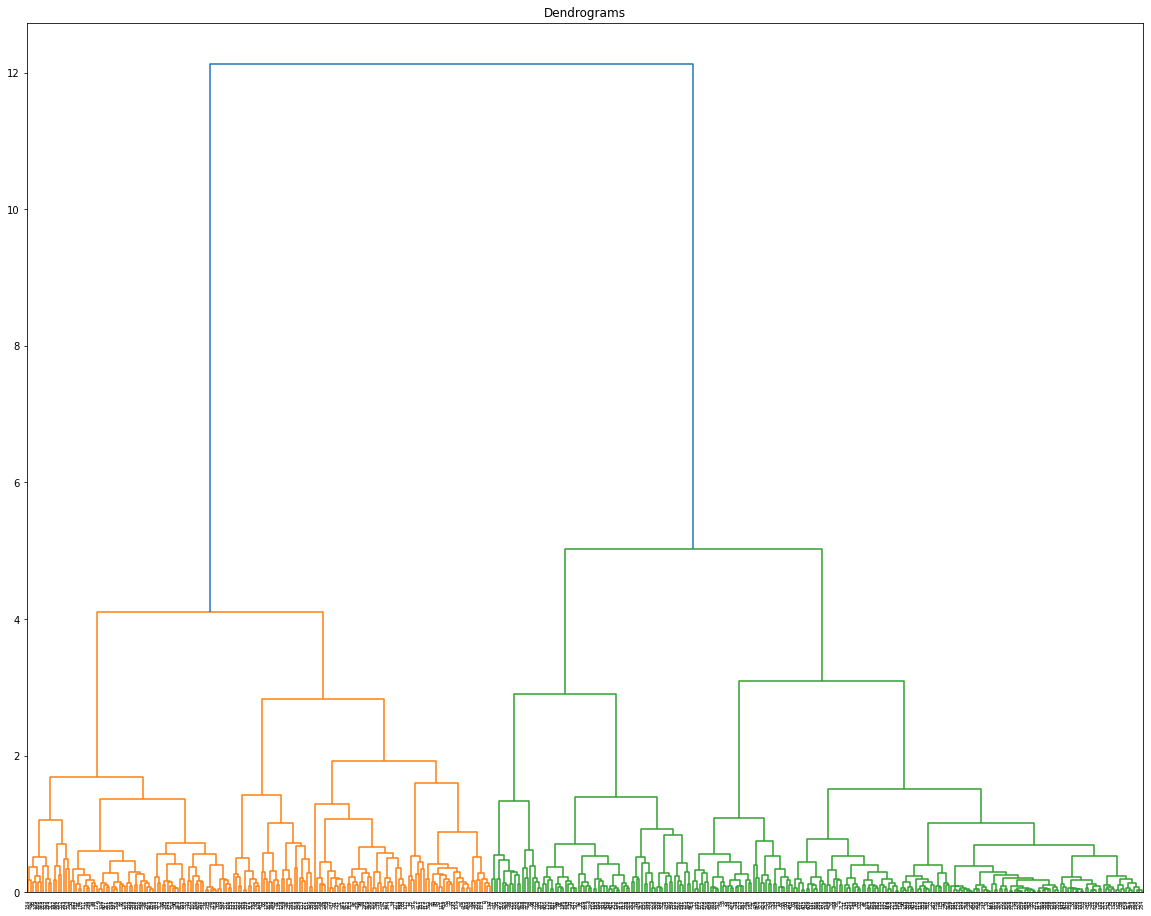

In [9]:
## dendrogram without the horizontal line
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,16))
plt.title('Dendrograms')
dendrograms = sch.dendrogram(sch.linkage(scaled_data,method='ward'))
plt.show()

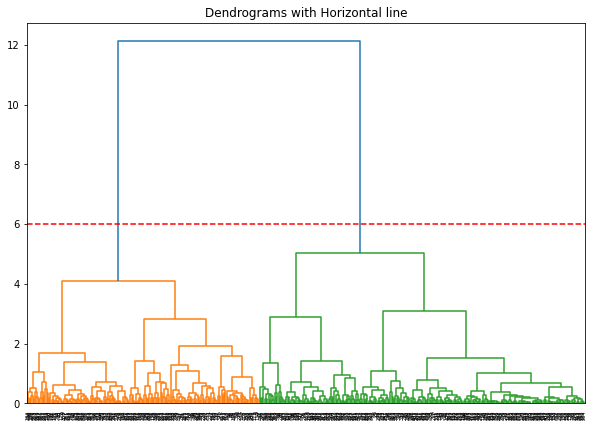

In [11]:
## dendrograms with the horizontal line
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,7))
plt.title('Dendrograms with Horizontal line')
dendrograms_final = sch.dendrogram(sch.linkage(scaled_data,method='ward'))
plt.axhline(y=6,color='r',linestyle='--')
plt.show()

We have two clusters as this line cuts the dendrogram at two points

In [13]:
## Performing hierarchical clustering for no. of clusters=2
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(scaled_data)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

In [15]:
len(cluster.fit_predict(scaled_data))

440

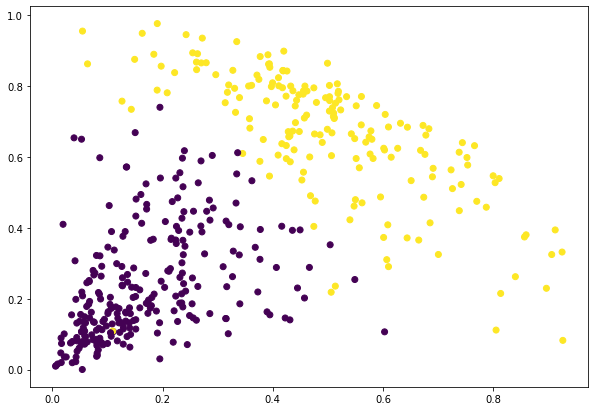

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(x=scaled_data['Milk'],y=scaled_data['Grocery'],c=cluster.labels_)

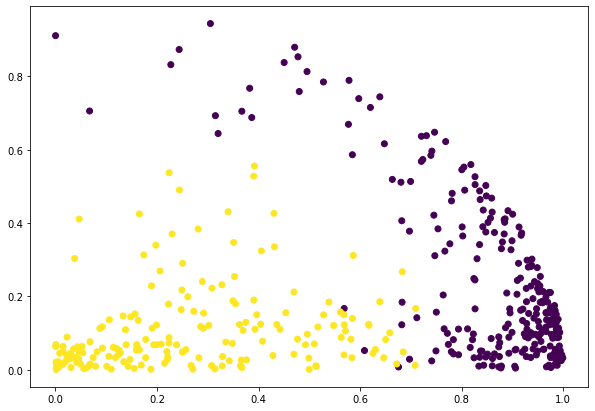

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(x=scaled_data['Fresh'],y=scaled_data['Frozen'],c=cluster.labels_) ## c-->array-like or list of colors or color

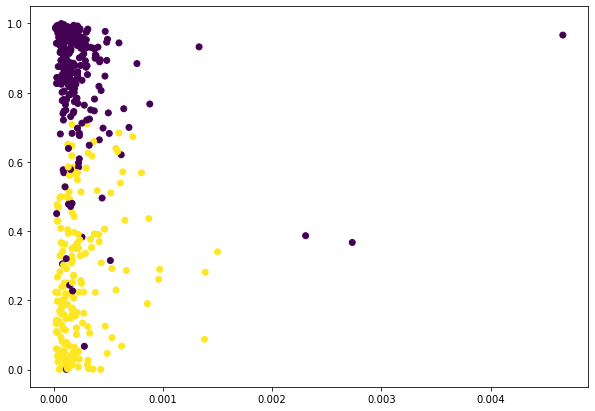

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(x=scaled_data['Region'],y=scaled_data['Fresh'],c=cluster.labels_) ## c-->array-like or list of colors or color

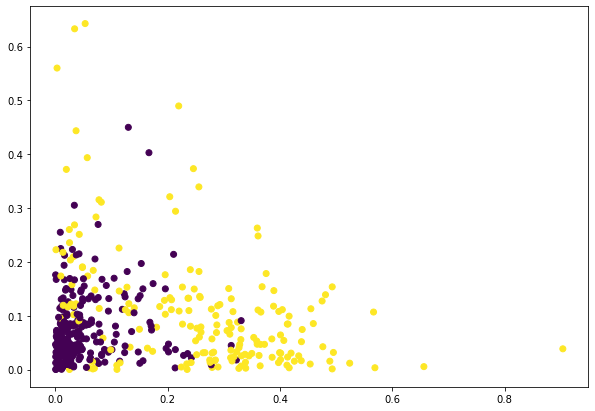

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(x=scaled_data['Detergents_Paper'],y=scaled_data['Delicassen'],c=cluster.labels_) ## c-->array-like or list of colors or color